# Analizando accidentes de bicicleta en 2019

In [ ]:
from dbfread import DBF
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import fs

In [ ]:
MAIN_DIR = fs.open_fs("../../data/raw/Bicis/Accidentes")
CSV_DIR = MAIN_DIR.getsyspath("accidentado_ciclista.dbf")

dbf = DBF(CSV_DIR)
df = pd.DataFrame(iter(dbf))
df

,no_folio,fecha_even,ano_evento,mes,hora,condicion,tipo_de_ev,coordenada,coordena_1,punto_1,...,identidad,unidad_med,lugar_del_,trasladado,hospital,dia,hora2,prioridad,observacio,ID
0,908158,2019-01-02,2019,Enero,13:51,LESIONADO,CAIDA DE CICLISTA,-99.133040,19.425890,JOSE MA IZAZAGA,...,CICLISTA,ERUM,,1.0,RUBEN LEÃ‘ERO,miÃ©rcoles,13.0,MEDIA,,1.0
1,913421,2019-01-05,2019,Enero,11:43,LESIONADO,CHOQUE,-99.159938,19.307784,SAN ALEJANDRO,...,CICLISTA,ERUM,,0.0,,sÃ¡bado,11.0,BAJA,,2.0
2,917736,2019-01-07,2019,Enero,21:39,LESIONADO,CAIDA DE CICLISTA,-99.140726,19.359761,EJE 8 SUR,...,CICLISTA,ERUM,,0.0,,lunes,21.0,BAJA,,3.0
3,918818,2019-01-08,2019,Enero,14:20,LESIONADO,CHOQUE,-99.129643,19.452971,EJE 2 OTE,...,CICLISTA,CRUZ ROJA,,0.0,,martes,14.0,BAJA,,4.0
4,921067,2019-01-09,2019,Enero,11:16,LESIONADO,CHOQUE,-99.123565,19.396535,CALZ GRAL IGNACIO ZARAGOZA,...,CICLISTA,ERUM,,0.0,,miÃ©rcoles,11.0,BAJA,,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,2332323,2019-12-28,2019,Diciembre,1:31,LESIONADO,CAIDA DE CICLISTA,-99.297696,19.347056,PROL 16 DE SEPTIEMBRE,...,CICLISTA,PC,,0.0,,sÃ¡bado,1.0,BAJA,,682.0
682,2334516,2019-12-28,2019,Diciembre,19:51,LESIONADO,CHOQUE,-99.099310,19.474964,EJE 3 OTE,...,CICLISTA,SAMU,,0.0,,sÃ¡bado,19.0,BAJA,,683.0
683,2337044,2019-12-29,2019,Diciembre,13:55,LESIONADO,CHOQUE,-99.137348,19.426271,JOSE MA IZAZAGA,...,CICLISTA,ERUM,,0.0,,domingo,13.0,BAJA,,684.0
684,2339464,2019-12-30,2019,Diciembre,11:14,LESIONADO,CHOQUE,-99.139106,19.293363,AV DE LAS TORRES,...,CICLISTA,ERUM,,0.0,,lunes,11.0,BAJA,,685.0


# Descripción de los campos
| Etiqueta del campo o variable | Descripción del Campo | Tipo de dato | Rango o valores que permite el campo                              |
|-------------------------------|------------------------|--------------|------------------------------------------------------------------|
| ID                            | IDENTIFICADOR          | Número entero | Número consecutivo                                               |
| no_folio                      | NÚMERO DE FOLIO        | Número entero | Número consecutivo                                               |
| fecha_even                    | FECHA DE EVENTO         | Fecha        | aaaa-mm-dd                                                       |
| ano_evento                    | AÑO DE EVENTO           | Número entero | 2019                                                             |
| mes                           | MES                      | Alfanumérico  | Enero a Septiembre                                               |
| hora                          | HORA                     | Número decimal| 0:00                                                             |
| condicion                     | CONDICIÓN                | Alfanumérico  | Texto                                                            |
| tipo_de_ev                    | TIPO DE EVENTO           | Alfanumérico  | Texto                                                            |
| coordenada                    | COORDENADAS LONGITUD DECIMAS DE GRADO | Número decimal| Valor X                                                  |
| coordena_1                    | COORDENADAS LATITUD DECIMAS DE GRADO | Número decimal| Valor Y                                                  |
| punto_1                       | PUNTO 1                  | Alfanumérico  | Texto                                                            |
| punto_2                       | PUNTO 2                  | Alfanumérico  | Texto                                                            |
| colonia                       | COLONIA                  | Alfanumérico  | Catálogo de Colonias Instituto Electoral (IECM)                  |
| alcaldia                      | ALCALDÍA                 | Alfanumérico  | Nombre de AGEE (Área Geoestadistica Estatal), de acuerdo al Marco Geoestadístico Nacional para la Ciudad de México |
| tipo_de_ve                    | TIPO DE VEHICULO         | Alfanumérico  | Texto                                                            |
| tipo_de__1                    | TIPO DE VEHICULO 1       | Alfanumérico  | Texto                                                            |
| tipo_de__2                    | TIPO DE VEHICULO 2       | Alfanumérico  | Texto                                                            |
| tipo_de__3                    | TIPO DE VEHICULO 3       | Alfanumérico  | Texto                                                            |
| marca_de_v                    | MARCA DE VEHICULO        | Alfanumérico  | Texto                                                            |
| marca_de_1                    | MARCA DE VEHICULO 1      | Alfanumérico  | Texto                                                            |
| marca_de_2                    | MARCA DE VEHICULO 2      | Alfanumérico  | Texto                                                            |
| marca_de_3                    | MARCA DE VEHICULO 3      | Alfanumérico  | Texto                                                            |
| lesiones                      | LESIONES                 | Alfanumérico  | Texto                                                            |
| edad_occis                    | EDAD DE OCCISO           | Número entero | 22 a 65                                                          |
| edad_lesio                    | EDAD DE LESIONADO        | Número entero | 10 a 87                                                          |
| total_occi                    | TOTAL DE OCCISOS         | Número entero | 1                                                               |
| occisos_fe                    | OCCISOS FEMENINOS        | Número entero | 1                                                               |
| occisos_ma                    | OCCISOS MASCULINOS        | Número entero | 1                                                               |
| total_lesi                    | TOTAL LESIONADOS         | Número entero | 1 a 5                                                            |
| lesionados                    | LESIONADOS               | Número entero | 2 a 5                                                            |
| lesionad_1                    | LESIONADOS_1             | Número entero | 1 a 3                                                            |
| lesionado_                    | LESIONADO                | Número entero | 1                                                               |
| identidad                     | IDENTIDAD                | Alfanumérico  | Texto                                                            |
| unidad_med                    | UNIDAD MEDICA            | Alfanumérico  | Texto                                                            |
| lugar_del_                    | LUGAR DE LOS HECHOS      | Alfanumérico  | Texto                                                            |
| trasladado                    | TRASLADO                 | Número entero | 1 a 2                                                            |
| hospital                      | HOSPITAL                 | Alfanumérico  | Texto                                                            |
| dia                           | DÍA                      | Alfanumérico  | Texto                                                            |
| hora2                         | HORA2                    | Número decimal| 0:00                                                             |
| prioridad                     | PRIORIDAD                | Alfanumérico  | Texto                                                            |
| observacio                    | OBSERVACIÓN              | Alfanumérico  | Texto                                                            |


In [ ]:
# Importing libraries
from unidecode import unidecode  # Importar la función unidecode
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Adjusting data types.
df['datetime'] = pd.to_datetime(df['fecha_even'].astype(str) + ' ' + df['hora'].astype(str))
df['fecha_even'] = pd.to_datetime(df['fecha_even'])
df['hora'] = pd.to_datetime(df['hora'], format='%H:%M').dt.hour

In [ ]:
alcaldias = {
'CUAUHTEMOC': 'Cuauhtémoc', 
'IZTACALCO': 'Iztacalco', 
'BENITO JUAREZ': 'Benito Juárez',
'COYOACAN' : 'Coyoacán',
'VENUSTIANO CARRANZA' : 'Venustiano Carranza',
'GUSTAVO A MADERO': 'Gustavo A. Madero',
'AZCAPOTZALCO': 'Azcapotzalco',
'MIGUEL HIDALGO' : 'Miguel Hidalgo',
'TLALPAN' : 'Tlalpan',
'IZTAPALAPA' : 'Iztapalapa',
'XOCHIMILCO' : 'Xochimilco',
'ALVARO OBREGON' : 'Álvaro Obregón',
'CUAJIMALPA' : 'Cuajimalpa de Morelos',
'TLAHUAC' : 'Tláhuac',
'MAGDALENA CONTRERAS' : 'La Magdalena Contreras',
'MILPA ALTA' : 'Milpa Alta',
}
df['alcaldia'] = df['alcaldia'].map(lambda x: alcaldias[x])

In [ ]:
df.describe()

,fecha_even,hora,coordenada,coordena_1,total_occi,occisos_fe,occisos_ma,total_lesi,lesionados,lesionad_1,lesionado_,trasladado,hora2,ID,datetime
count,686,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686
mean,2019-08-05 09:24:39.883381760,13.760933,-99.140278,19.396518,0.016035,0.004373,0.011662,1.064140,0.208455,0.835277,0.020408,0.206997,13.760933,343.500000,2019-08-05 23:39:41.545189376
min,2019-01-02 00:00:00,0.000000,-99.297696,19.174588,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2019-01-02 13:51:00
25%,2019-05-30 06:00:00,9.000000,-99.170959,19.361682,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,9.000000,172.250000,2019-05-31 00:18:30
50%,2019-08-24 12:00:00,14.000000,-99.143610,19.407619,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,14.000000,343.500000,2019-08-25 03:28:30
75%,2019-10-24 00:00:00,18.000000,-99.110708,19.439636,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,18.000000,514.750000,2019-10-24 12:12:00
max,2019-12-31 00:00:00,23.000000,-98.970761,19.558322,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,1.000000,2.000000,23.000000,686.000000,2019-12-31 17:19:00
std,NaN,5.149841,0.048603,0.061813,0.125702,0.066033,0.107437,0.360814,0.460389,0.468553,0.141495,0.419604,5.149841,198.175427,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   no_folio    686 non-null    object        
 1   fecha_even  686 non-null    datetime64[ns]
 2   ano_evento  686 non-null    object        
 3   mes         686 non-null    object        
 4   hora        686 non-null    int32         
 5   condicion   686 non-null    object        
 6   tipo_de_ev  686 non-null    object        
 7   coordenada  686 non-null    float64       
 8   coordena_1  686 non-null    float64       
 9   punto_1     686 non-null    object        
 10  punto_2     686 non-null    object        
 11  colonia     686 non-null    object        
 12  alcaldia    686 non-null    object        
 13  tipo_de_in  686 non-null    object        
 14  tipo_de_ve  686 non-null    object        
 15  tipo_de__1  686 non-null    object        
 16  tipo_de__2  686 non-null  

In [ ]:
df

,no_folio,fecha_even,ano_evento,mes,hora,condicion,tipo_de_ev,coordenada,coordena_1,punto_1,...,unidad_med,lugar_del_,trasladado,hospital,dia,hora2,prioridad,observacio,ID,datetime
0,908158,2019-01-02,2019,Enero,13,LESIONADO,CAIDA DE CICLISTA,-99.133040,19.425890,JOSE MA IZAZAGA,...,ERUM,,1.0,RUBEN LEÃ‘ERO,miÃ©rcoles,13.0,MEDIA,,1.0,2019-01-02 13:51:00
1,913421,2019-01-05,2019,Enero,11,LESIONADO,CHOQUE,-99.159938,19.307784,SAN ALEJANDRO,...,ERUM,,0.0,,sÃ¡bado,11.0,BAJA,,2.0,2019-01-05 11:43:00
2,917736,2019-01-07,2019,Enero,21,LESIONADO,CAIDA DE CICLISTA,-99.140726,19.359761,EJE 8 SUR,...,ERUM,,0.0,,lunes,21.0,BAJA,,3.0,2019-01-07 21:39:00
3,918818,2019-01-08,2019,Enero,14,LESIONADO,CHOQUE,-99.129643,19.452971,EJE 2 OTE,...,CRUZ ROJA,,0.0,,martes,14.0,BAJA,,4.0,2019-01-08 14:20:00
4,921067,2019-01-09,2019,Enero,11,LESIONADO,CHOQUE,-99.123565,19.396535,CALZ GRAL IGNACIO ZARAGOZA,...,ERUM,,0.0,,miÃ©rcoles,11.0,BAJA,,5.0,2019-01-09 11:16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,2332323,2019-12-28,2019,Diciembre,1,LESIONADO,CAIDA DE CICLISTA,-99.297696,19.347056,PROL 16 DE SEPTIEMBRE,...,PC,,0.0,,sÃ¡bado,1.0,BAJA,,682.0,2019-12-28 01:31:00
682,2334516,2019-12-28,2019,Diciembre,19,LESIONADO,CHOQUE,-99.099310,19.474964,EJE 3 OTE,...,SAMU,,0.0,,sÃ¡bado,19.0,BAJA,,683.0,2019-12-28 19:51:00
683,2337044,2019-12-29,2019,Diciembre,13,LESIONADO,CHOQUE,-99.137348,19.426271,JOSE MA IZAZAGA,...,ERUM,,0.0,,domingo,13.0,BAJA,,684.0,2019-12-29 13:55:00
684,2339464,2019-12-30,2019,Diciembre,11,LESIONADO,CHOQUE,-99.139106,19.293363,AV DE LAS TORRES,...,ERUM,,0.0,,lunes,11.0,BAJA,,685.0,2019-12-30 11:14:00


# Limpieza del datos

In [ ]:
# Cleaning date

corrections = {'miA(c)rcoles': 'miércoles', 'sA!bado': 'sábado'}
df['dia'] = df['dia'].apply(lambda x: corrections.get(x, unidecode(x)))

In [ ]:
# Cleaning hospital
corrections_hospital = {'RUBEN LEÃ‘ERO': 'RUBEN LEÑERO', 'ESPAÃ‘OL': 'ESPAÑOL'}
df['hospital'] = df['hospital'].apply(lambda x: corrections_hospital.get(x, unidecode(x)))

# Exploración de datos

In [ ]:
df_meses = df['mes'].value_counts().reset_index()
df_meses.columns = ['mes', 'count']
df_meses = df_meses.reindex([7,8,9,11,6,10,3,1,4,0,2,5])
df_meses


,mes,count
7,Enero,37
8,Febrero,37
9,Marzo,35
11,Abril,23
6,Mayo,41
10,Junio,34
3,Julio,78
1,Agosto,83
4,Septiembre,78
0,Octubre,84


## Frecuencia Mensual

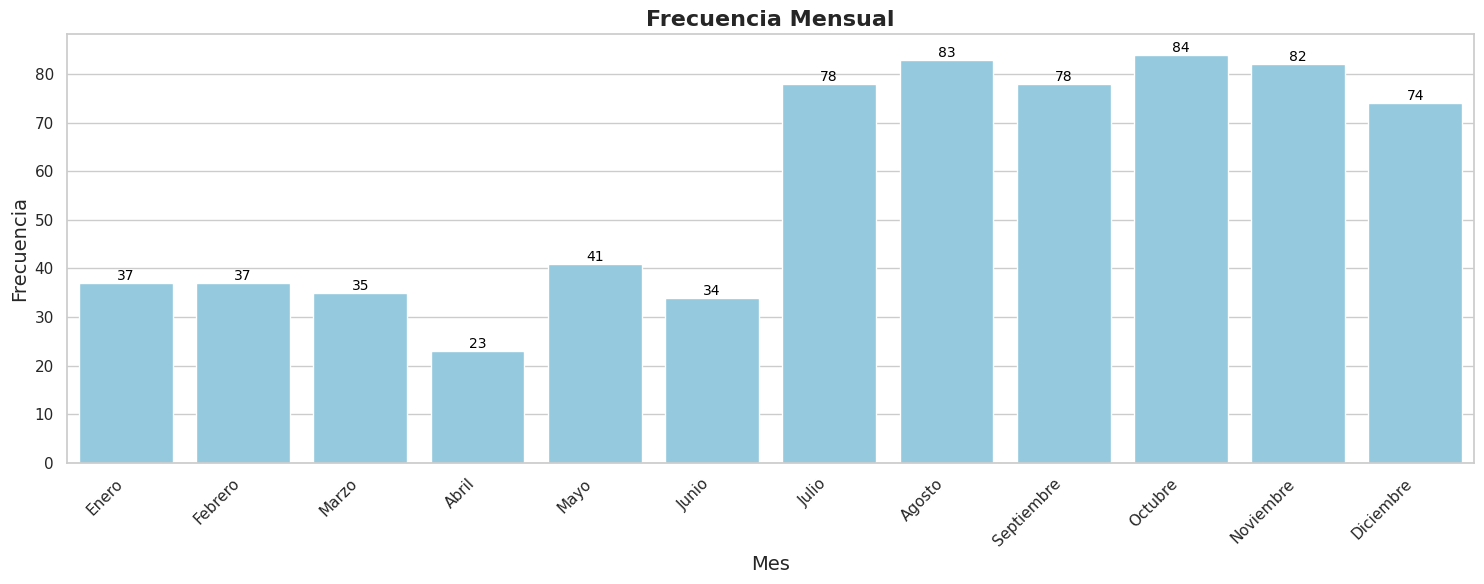

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_meses has 'mes' and 'count' columns
plt.figure(figsize=(15, 6))

# Use seaborn for styling
sns.set(style="whitegrid")

# Main bar chart
bars = sns.barplot(x=df_meses['mes'], y=df_meses['count'], color='skyblue')

# Show the value on top of each bar
for bar in bars.patches:
    yval = bar.get_height()
    bars.annotate(f'{int(yval)}', (bar.get_x() + bar.get_width()/2, yval), ha='center', va='bottom', fontsize=10, color='black')

# Chart configuration
plt.title('Frecuencia Mensual', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Añadir etiquetas a los ejes con el nombre del mes en lugar del número
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
plt.xticks(range(len(meses)), meses, rotation=45, ha='right')

# Añadir separadores de miles en el eje Y para hacer más legible la cifra
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Ajustes adicionales según tus preferencias
plt.tight_layout()

# Guardar la gráfica si es necesario
# plt.savefig('grafica_frecuencia_mensual.png')

# Mostrar la gráfica
plt.show()


In [ ]:
df_hours = df['hora'].value_counts().reset_index()
df_hours.columns = ['hour', 'count']
df_hours = df_hours.sort_values(by='hour')
df_hours

,hour,count
23,0,1
18,1,7
19,2,6
21,3,3
22,4,1
20,5,6
17,6,11
12,7,36
1,8,51
0,9,59


/tmp/ipykernel_289/2372614149.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=df_hours['hour'], y=df_hours['count'], palette='viridis')


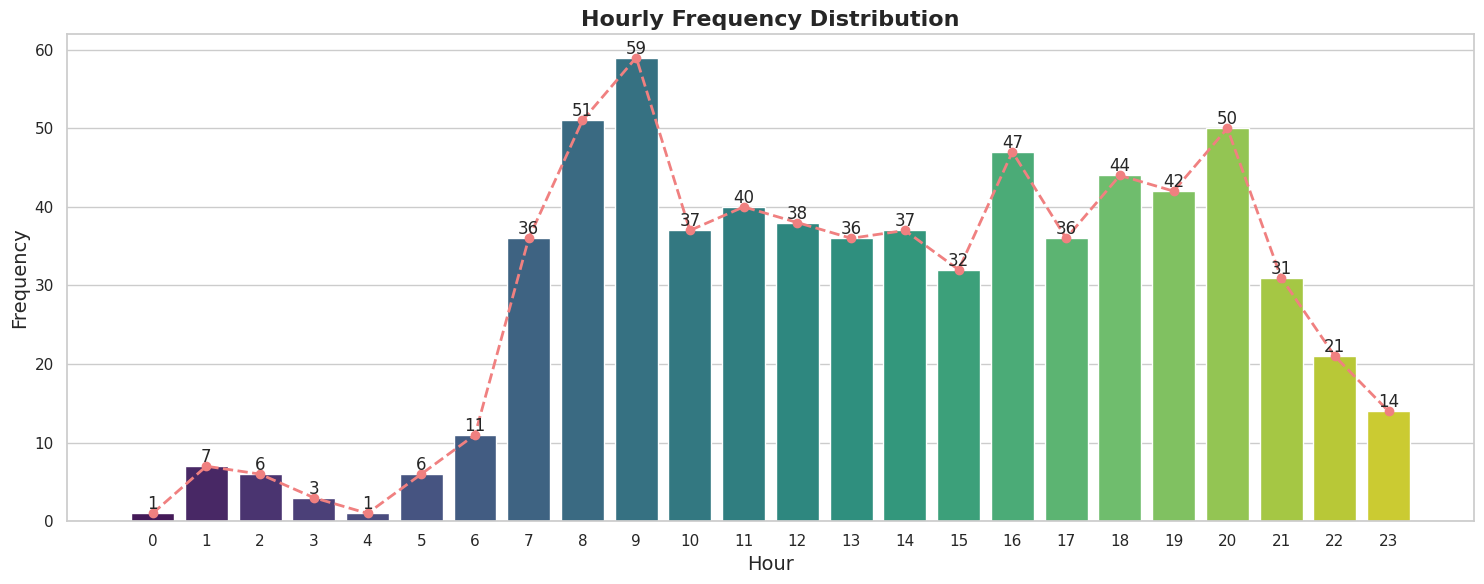

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_hours has 'hour' and 'count' columns
plt.figure(figsize=(15, 6))

# Use seaborn for a stylish appearance
sns.set(style="whitegrid")

# Main bar chart with color mapping based on the count
bars = sns.barplot(x=df_hours['hour'], y=df_hours['count'], palette='viridis')

# Line chart on top of the bar chart with a lighter color and dashed line
plt.plot(df_hours['hour'], df_hours['count'], color='lightcoral', marker='o', linestyle='--', linewidth=2)

# Show the value on top of each bar as integer
for bar in bars.patches:
    yval = bar.get_height()
    bars.annotate(f'{int(yval)}', (bar.get_x() + bar.get_width()/2, yval), ha='center', va='bottom')

# Chart configuration
plt.title('Hourly Frequency Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add thousand separators on the Y-axis to enhance readability
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Additional adjustments according to your preferences
plt.tight_layout()

# Show the chart
plt.show()


In [ ]:
df_dayofweek = df['dia'].value_counts().reset_index()
df_dayofweek.columns = ['day', 'count']
df_dayofweek = df_dayofweek.reindex([3,0,4,1,2,6,5])
df_dayofweek

,day,count
3,lunes,100
0,martes,124
4,miA(c)rcoles,86
1,jueves,115
2,viernes,101
6,sA!bado,77
5,domingo,83


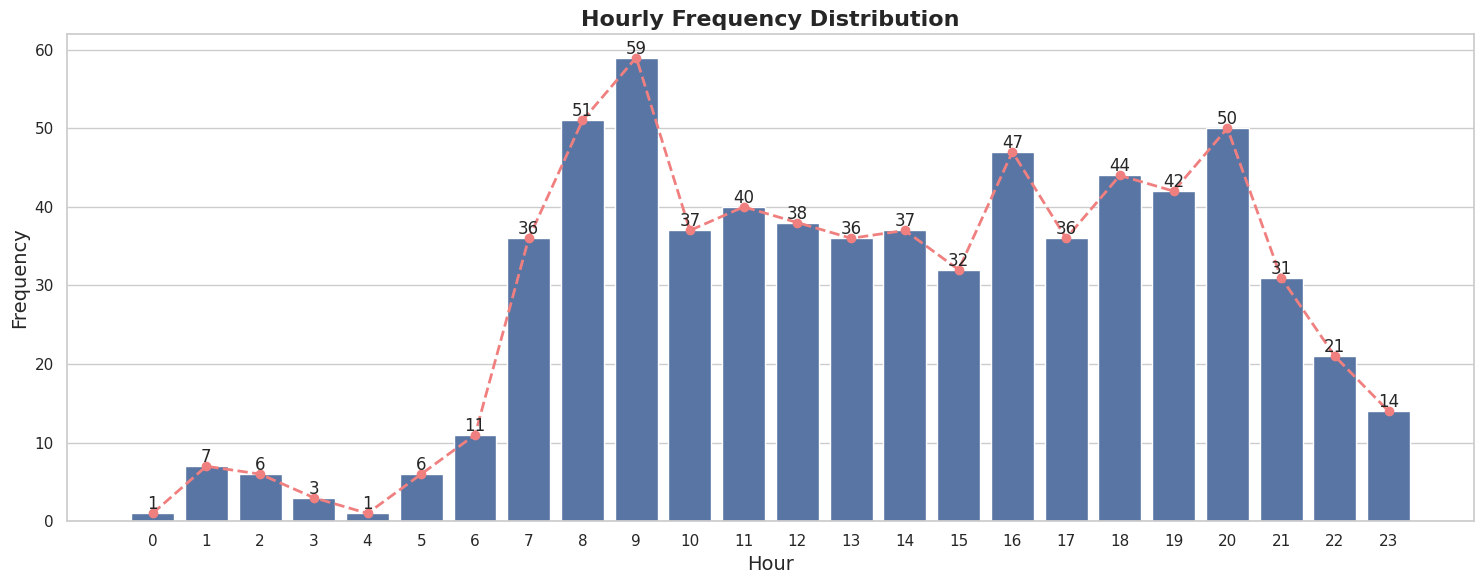

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_hours has 'hour' and 'count' columns
plt.figure(figsize=(15, 6))

# Use seaborn for a stylish appearance
sns.set(style="whitegrid")

# Main bar chart with color gradient based on 'count'
bars = sns.barplot(x=df_hours['hour'], y=df_hours['count'])

# Line chart on top of the bar chart with a lighter color and dashed line
plt.plot(df_hours['hour'], df_hours['count'], color='lightcoral', marker='o', linestyle='--', linewidth=2)

# Show the value on top of each bar as integer
for bar in bars.patches:
    yval = bar.get_height()
    bars.annotate(f'{int(yval)}', (bar.get_x() + bar.get_width()/2, yval), ha='center', va='bottom')

# Chart configuration
plt.title('Hourly Frequency Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add thousand separators on the Y-axis to enhance readability
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Additional adjustments according to your preferences
plt.tight_layout()

# Show the chart
plt.show()


In [ ]:
# Create a DataFrame with age counts
df_ages = df['edad_lesio'].value_counts().reset_index()
df_ages.columns = ['age', 'count']

# Drop rows where 'age' is 'SD'
df_ages = df_ages[df_ages['age'] != 'SD']

# Convert the 'age' column to numeric
df_ages['age'] = pd.to_numeric(df_ages['age'], errors='coerce')

# Sort the DataFrame by the 'age' column in ascending order
df_ages = df_ages.sort_values(by='age')
df_ages


,age,count
109,2.0,1
80,3.0,1
71,4.0,1
59,7.0,1
53,9.0,2
...,...,...
107,NaN,1
108,NaN,1
110,NaN,1
112,NaN,1


## Frecuencia por edad

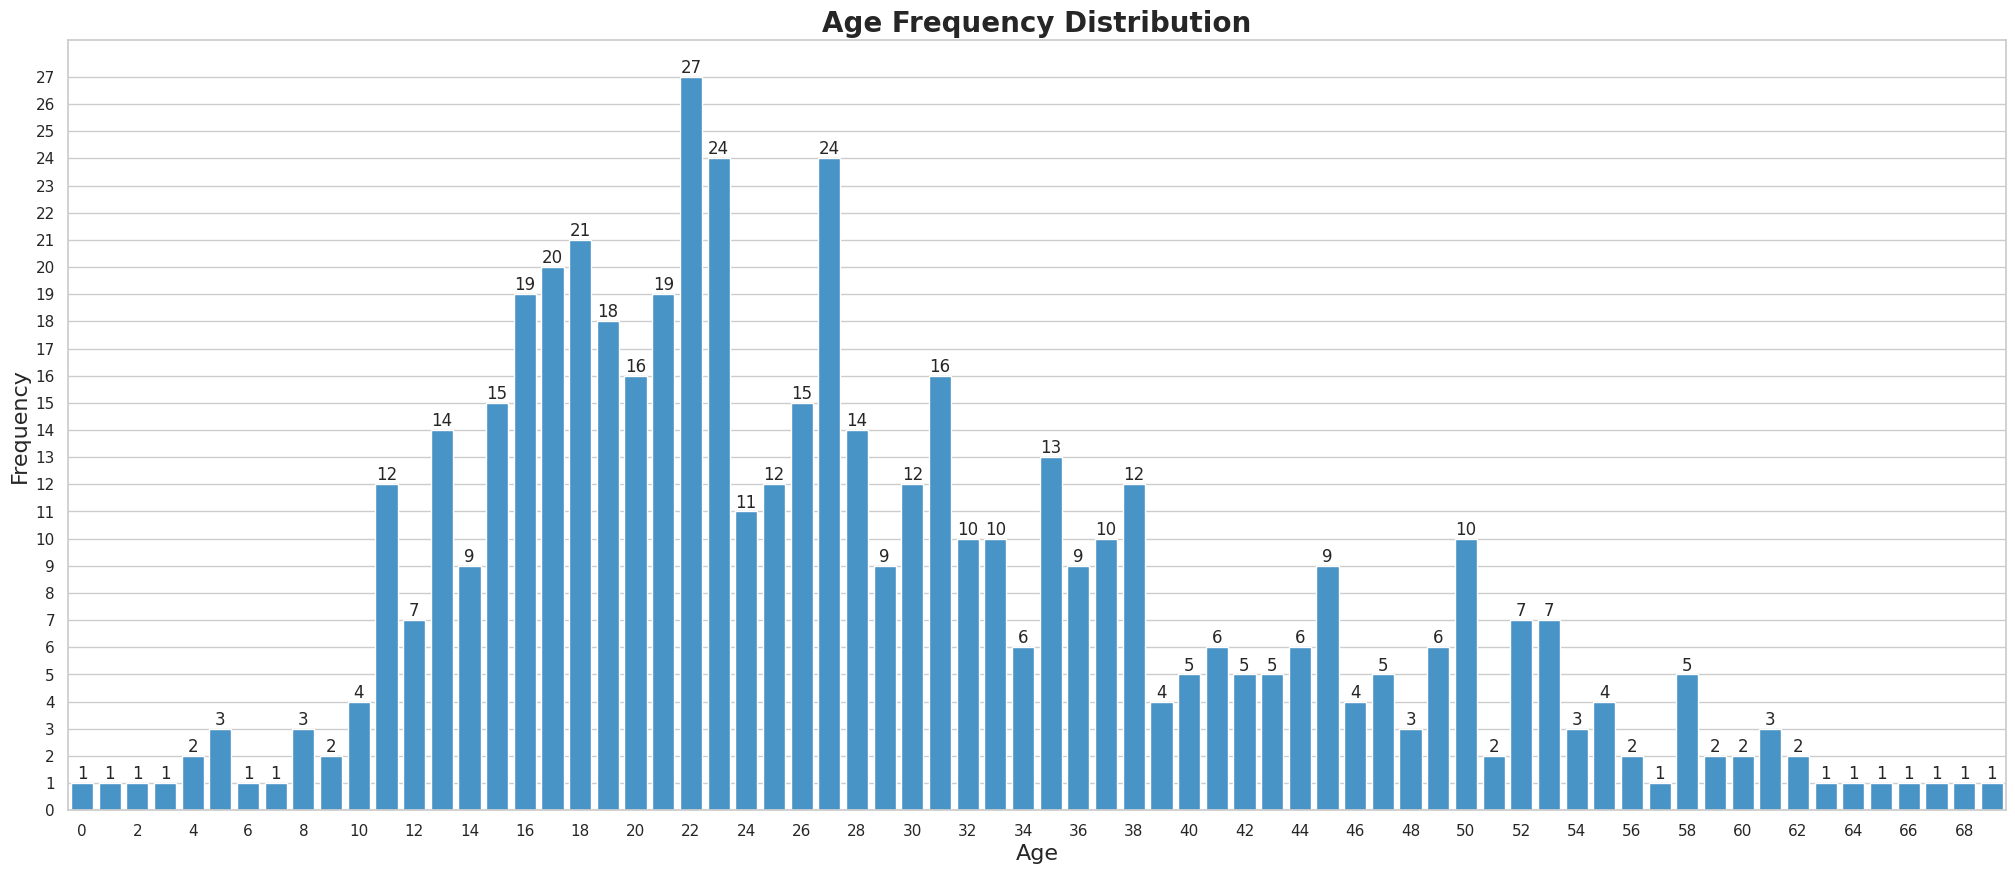

In [ ]:
# Assuming df_ages has 'age' and 'count' columns
plt.figure(figsize=(25, 10))

# Use seaborn for styling
sns.set(style="whitegrid")

# Main bar chart
bars = sns.barplot(x=df_ages['age'], y=df_ages['count'], color='#3498db')

# Show the integer value on top of each bar
for bar in bars.patches:
    yval = bar.get_height()
    bars.annotate(int(yval), (bar.get_x() + bar.get_width()/2, yval), ha='center', va='bottom')

# Chart configuration
plt.title('Age Frequency Distribution', fontsize=20, fontweight='bold')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Display integers on both axes
# plt.xticks(df_ages['age'].astype(int))  # Assuming 'age' is numeric
plt.yticks(range(0, int(df_ages['count'].max())+1))

# Show the chart
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

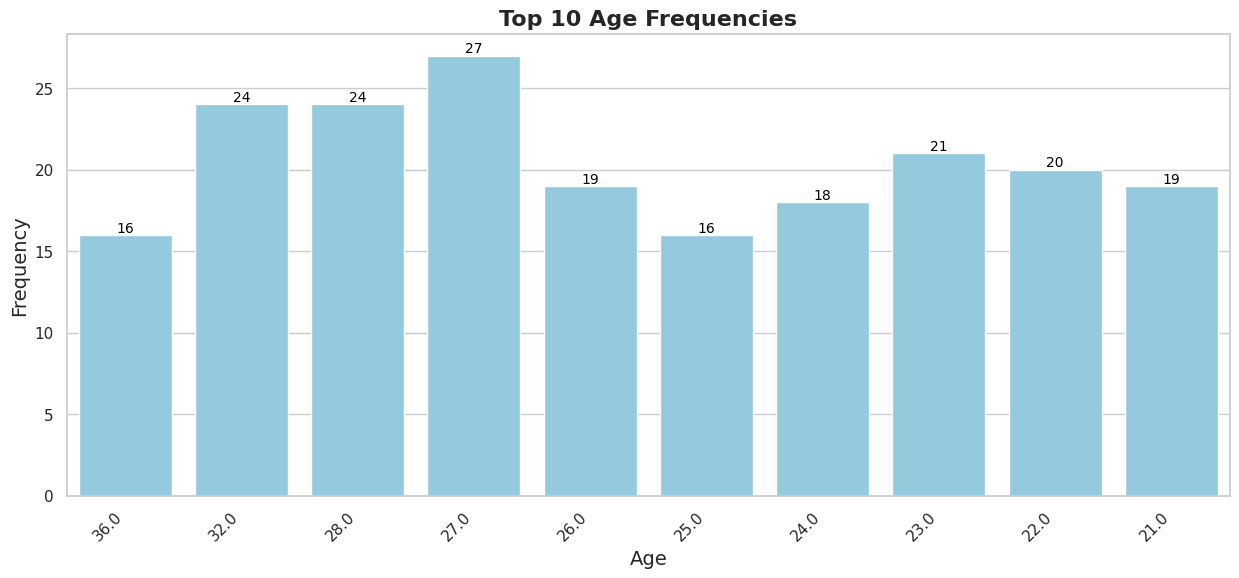

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame with age counts
df_ages = df['edad_lesio'].value_counts().reset_index()
df_ages.columns = ['age', 'count']

# Drop rows where 'age' is 'SD'
df_ages = df_ages[df_ages['age'] != 'SD']

# Convert the 'age' column to numeric
df_ages['age'] = pd.to_numeric(df_ages['age'], errors='coerce')

# Round the 'age' column to integers
df_ages['age'] = df_ages['age'].round()

# Sort the DataFrame by the 'count' column in descending order
df_ages = df_ages.sort_values(by='count', ascending=False)

# Select the top 10 ages
df_top_10 = df_ages.head(10)

# Plot the top 10 ages
plt.figure(figsize=(15, 6))
bars = sns.barplot(x=df_top_10['age'], y=df_top_10['count'], color='skyblue')

# Show the integer value on top of each bar
for bar in bars.patches:
    yval = bar.get_height()
    bars.annotate(int(yval), (bar.get_x() + bar.get_width()/2, yval),
                  ha='center', va='bottom', fontsize=10, color='black')

plt.title('Top 10 Age Frequencies', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.gca().invert_xaxis()  # Invertir el eje x para ordenar de mayor a menor
plt.show()


# Accidentes terrestes por alcaldía

In [ ]:
import pandas as pd

# Ruta del archivo CSV
ruta_archivo = "/work/Accidentes Terrestres/accidentes_terrestres_alcaldias_cdmx_84.csv"

# Leer el archivo CSV en un DataFrame
df_acc = pd.read_csv(ruta_archivo)
df_acc['Número de accidente'] = pd.to_numeric(df_acc['Número de accidente'].str.replace(',', ''), errors='coerce')
df_acc

,Alcaldía,Número de accidente
0,Álvaro Obregón,786
1,Azcapotzalco,492
2,Benito Juárez,837
3,Coyoacán,736
4,Cuajimalpa de Morelos,286
5,Cuauhtémoc,1524
6,Gustavo A. Madero,1407
7,Iztacalco,421
8,Iztapalapa,1207
9,La Magdalena Contreras,125


/tmp/ipykernel_289/2619651916.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Número de accidente', y='Alcaldía', data=df_acc_sorted, palette='viridis')


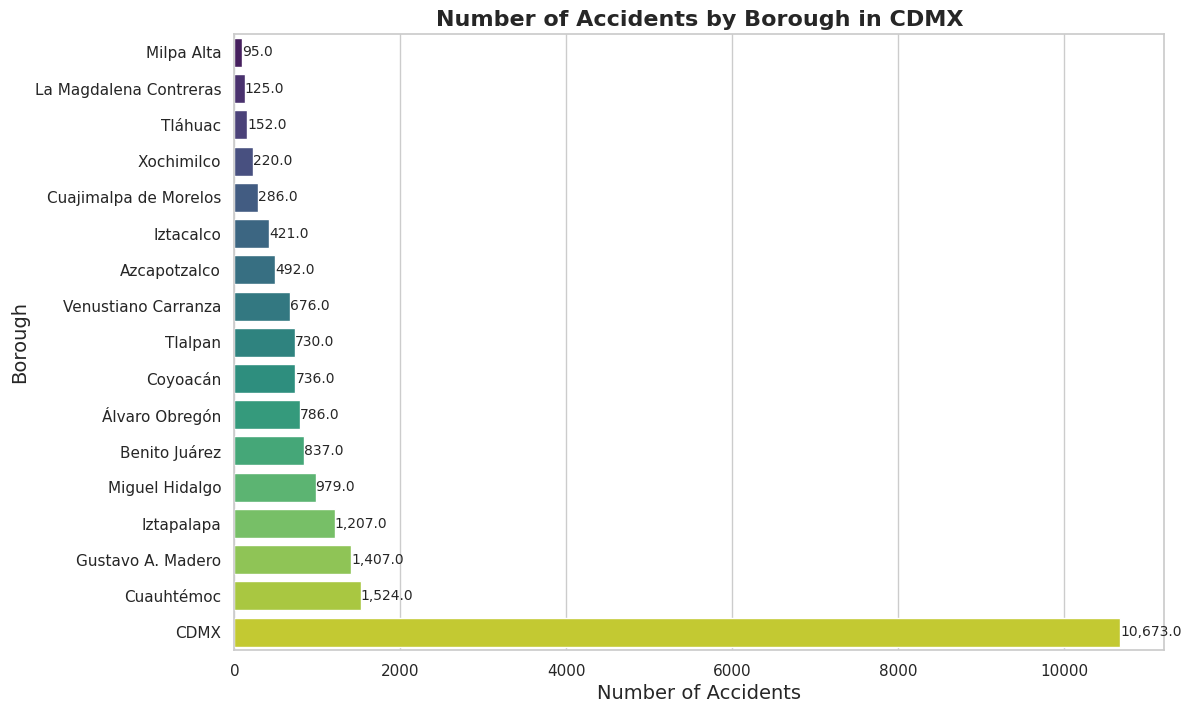

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar el DataFrame por la columna 'Número de accidente'
df_acc_sorted = df_acc.sort_values(by='Número de accidente', ascending=True)

# Crear un gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='Número de accidente', y='Alcaldía', data=df_acc_sorted, palette='viridis')

# Configurar el diseño del gráfico
plt.title('Number of Accidents by Borough in CDMX', fontsize=16, fontweight='bold')
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('Borough', fontsize=14)

# Añadir etiquetas en las barras
for bar in plt.gca().patches:
    yval = bar.get_y() + bar.get_height() / 2
    xval = bar.get_width()
    plt.text(xval, yval, f'{xval:,}', ha='left', va='center', fontsize=10)

# Mostrar el gráfico
plt.show()

In [ ]:
df_alc = df['alcaldia'].value_counts().reset_index()
# df_alc.columns = ['mes', 'count']
df_alc


,alcaldia,count
0,Cuauhtémoc,156
1,Miguel Hidalgo,81
2,Benito Juárez,74
3,Iztapalapa,69
4,Coyoacán,54
5,Venustiano Carranza,44
6,Gustavo A. Madero,44
7,Azcapotzalco,44
8,Xochimilco,32
9,Iztacalco,32


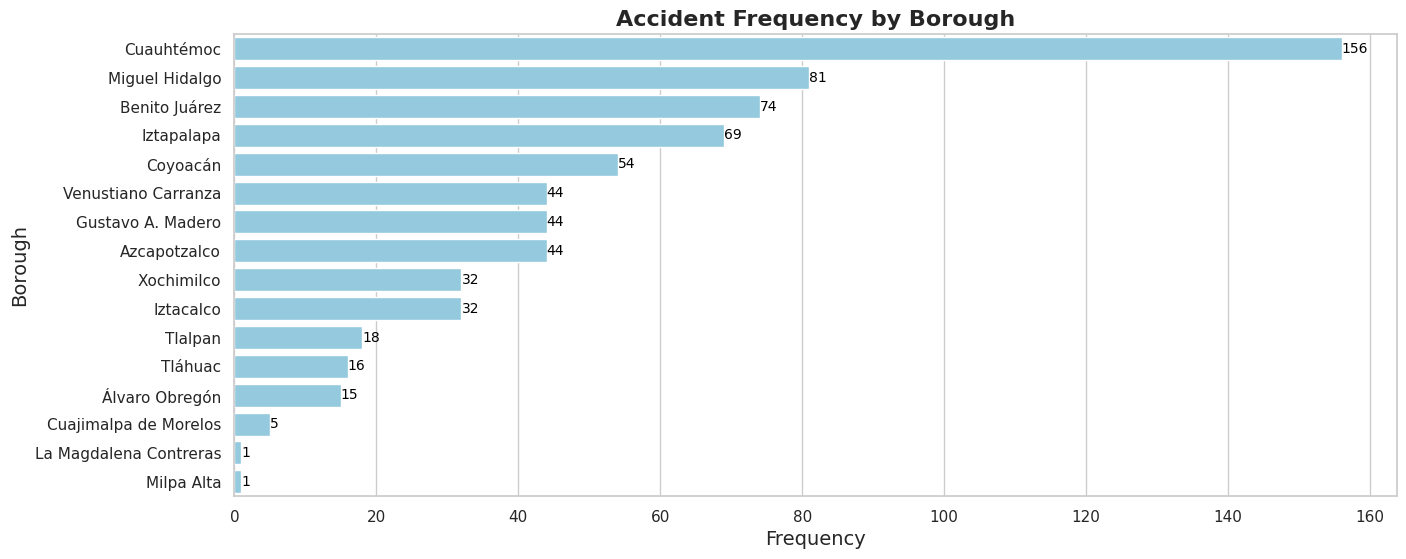

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_months has 'month' and 'count' columns
plt.figure(figsize=(15, 6))

# Use seaborn for styling
sns.set(style="whitegrid")

# Main bar chart - Change in x and y axes
bars = sns.barplot(x=df_alc['count'], y=df_alc['alcaldia'], color='skyblue')

# Show the value on top of each bar
for bar in bars.patches:
    xval = bar.get_width()
    bars.annotate(f'{int(xval)}', (xval, bar.get_y() + bar.get_height()/2), ha='left', va='center', fontsize=10, color='black')

# Chart configuration
plt.title('Accident Frequency by Borough', fontsize=16, fontweight='bold')
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Borough', fontsize=14)

# Show the plot
plt.show()


## Tipos de lesiones y occisos

In [ ]:
df_less = df[['lesiones']].copy()
df_less = df_less.replace('POLICONTUNDIDO POLICONTUNDIDO POLICONTUNDIDO', 'POLICONTUNDIDO').replace('POLICONTUNDIDO POLICONTUNDIDO', 'POLICONTUNDIDO').replace('POLICONTUDIDO', 'POLICONTUNDIDO')
df_less = df_less.replace('SIN SIGNOS VITALES', 'DECESO').replace('SIN DIAGNOSTICO SIN DIAGNOSTICO', 'SD').replace('SIN DIAGNOSTICO', 'SD')
df_less = df_less.replace('LUXACIÓN', 'LX')
df_less_count = df_less['lesiones'].value_counts().reset_index()
df_less_count

,lesiones,count
0,POLICONTUNDIDO,324
1,TCE,22
2,CX SIMPLES,13
3,LUMBALGIA,13
4,CX RODILLA DER,12
...,...,...
196,FX HOMBRO,1
197,LX RODILLA,1
198,FX NASAL,1
199,CX SIMPLES EN RODILLA IZQ,1


In [ ]:
df_less_filtered = df_less[['lesiones']].copy()

# Definir una función para asignar valores a la nueva columna 'less_id'
def asignar_less_id(texto):
    if 'CX' in texto:
        return 'CX - Cirugía'
    elif 'FX' in texto:
        return 'FX - Fractura'
    elif 'DECESO' in texto or 'MUERTE' in texto :
        return 'DECESO'
    elif 'POLICONTUNDIDO' in texto:
        return 'POLICONTUNDIDO'
    elif 'EC' in texto:
        return 'EC'
    elif 'TCE' in texto:
        return 'TCE'
    elif 'HX' in texto:
        return 'HX - Anamnesis'
    elif 'LX' in texto:
        return 'LX - Luxacción'
    else:
        return texto

# Aplicar la función a la columna 'lesiones' y crear la nueva columna 'less_id'
df_less_filtered['less_id'] = df_less_filtered['lesiones'].apply(asignar_less_id)

df_less_filtered

,lesiones,less_id
0,PROBABLE FX DE TIBIA Y PERONE,FX - Fractura
1,CX MANO DER,CX - Cirugía
2,HX REGION PARIETAL,HX - Anamnesis
3,POLICONTUNDIDO,POLICONTUNDIDO
4,CX PABELLON LADO DER,CX - Cirugía
...,...,...
681,LX EN CLAVICULA BRAZO IZQ,LX - Luxacción
682,HX DERMOABRASIVA,HX - Anamnesis
683,CX CLAVICULA IZQ,CX - Cirugía
684,CX ROTULA IZQ,CX - Cirugía


In [ ]:
df_less_count2 = df_less_filtered['less_id'].value_counts().reset_index()
df_less_count2 = df_less_count2[df_less_count2['count'] > 5]
df_less_count2

,less_id,count
0,POLICONTUNDIDO,331
1,CX - Cirugía,167
2,FX - Fractura,61
3,HX - Anamnesis,40
4,TCE,24
5,EC,17
6,LUMBALGIA,13
7,DECESO,10
8,LX - Luxacción,8
9,SD,8


In [ ]:
DeepnoteChart(df_less_count2, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"title":"Tipo de lesión"},"sort":null,"type":"nominal","field":"less_id","scale":{"type":"linear"}},"y":{"axis":{"title":"Cantidad de eventos"},"sort":null,"type":"quantitative","field":"count","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"count","scale":{"scheme":"deepnote_blues"},"aggregate":"sum"}}},{"mark":{"dx":0,"dy":-1,"fill":"black","type":"text","align":"center","baseline":"bottom"},"encoding":{"x":{"axis":{"title":"Tipo de lesión"},"sort":null,"type":"nominal","field":"less_id","scale":{"type":"linear"}},"y":{"axis":{"title":"Cantidad de eventos"},"sort":null,"type":"quantitative","field":"count","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"text":{"sort":null,"type":"quantitative","field":"count","aggregate":"sum"},"color":{"sort":null,"type":"quantitative","field":"count","scale":{"scheme":"deepnote_blues"},"aggregate":"sum"}}}]}],"title":"Tipo de lesiones","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{}}""")

In [ ]:
df_occi = df['condicion'].value_counts().reset_index()
df_occi['count'] = np.round((df_occi['count'] / df_occi['count'].sum())*100,2)
df_occi

,condicion,count
0,LESIONADO,98.4
1,OCCISO,1.6


In [ ]:
DeepnoteChart(df_occi, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"title":"Tipo de accidente"},"sort":null,"type":"nominal","field":"condicion","scale":{"type":"linear"}},"y":{"axis":{"title":"Cantidad de eventos"},"sort":null,"type":"quantitative","field":"count","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"count","scale":{"scheme":"deepnote_blues"},"aggregate":"sum"}}},{"mark":{"dx":0,"dy":-1,"fill":"black","type":"text","align":"center","baseline":"bottom"},"encoding":{"x":{"axis":{"title":"Tipo de accidente"},"sort":null,"type":"nominal","field":"condicion","scale":{"type":"linear"}},"y":{"axis":{"title":"Cantidad de eventos"},"sort":null,"type":"quantitative","field":"count","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"text":{"sort":null,"type":"quantitative","field":"count","aggregate":"sum"},"color":{"sort":null,"type":"quantitative","field":"count","scale":{"scheme":"deepnote_blues"},"aggregate":"sum"}}}]}],"title":"Tipos de accidente (%)","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{}}""")

In [ ]:
df_occi_fil = df[df['total_occi'] == 1]
df_occi_fil

,no_folio,fecha_even,ano_evento,mes,hora,condicion,tipo_de_ev,coordenada,coordena_1,punto_1,...,unidad_med,lugar_del_,trasladado,hospital,dia,hora2,prioridad,observacio,ID,datetime
47,1432767,2019-05-04,2019,Mayo,19,OCCISO,CHOQUE,-99.199770,19.442699,AV RIO SAN JOAQUIN,...,CCO/CRUZ ROJA,EN EL LUGAR DE LOS HECHOS,0.0,,sÃ¡bado,19.0,ALTA,TRAILER,48.0,2019-05-04 19:50:00
56,1547278,2019-05-20,2019,Mayo,23,OCCISO,CHOQUE,-99.026040,19.344796,EJE 8 SUR,...,CCO/ERUM,EN EL LUGAR DE LOS HECHOS,0.0,,lunes,23.0,ALTA,,57.0,2019-05-20 23:50:00
181,2119702,2019-10-24,2019,Octubre,13,OCCISO,CHOQUE,-99.081534,19.373979,ABARROTES Y VIVERES,...,CCO/ERUM,EN EL LUGAR DE LOS HECHOS,0.0,,jueves,13.0,ALTA,,182.0,2019-10-24 13:16:00
189,2165910,2019-11-07,2019,Noviembre,8,OCCISO,CHOQUE,-99.172151,19.474296,RABAUL,...,CCO/CRUZ ROJA,EN EL LUGAR DE LOS HECHOS,0.0,,jueves,8.0,ALTA,CABINA CON PLATAFORMA SIN CAJA,190.0,2019-11-07 08:13:00
197,2189829,2019-11-14,2019,Noviembre,15,OCCISO,CHOQUE,-99.156535,19.473694,AV CUITLAHUAC,...,CCO/1Â° CONTACTO,EN EL LUGAR DE LOS HECHOS,0.0,,jueves,15.0,ALTA,TRACTO CAMION,198.0,2019-11-14 15:20:00
260,1128722,2019-03-19,2019,Marzo,23,OCCISO,CHOQUE,-99.076859,19.381653,PORTAL DE LAS FLORES,...,CCO/SAMU,EN EL LUGAR DE LOS HECHOS,0.0,,martes,23.0,ALTA,SD,261.0,2019-03-19 23:50:00
282,1647370,2019-06-10,2019,Junio,8,OCCISO,CHOQUE,-99.189740,19.454100,GOLFO DE ADEN,...,CCO/CRUZ ROJA,EN EL LUGAR DE LOS HECHOS,0.0,,lunes,8.0,ALTA,,283.0,2019-06-10 08:31:00
324,1884018,2019-08-17,2019,Agosto,21,OCCISO,CHOQUE,-99.006063,19.270901,SAN RAFAEL ATLIXCO,...,CCO/PC,EN EL LUGAR DE LOS HECHOS,0.0,,sÃ¡bado,21.0,ALTA,RECOLECTOR DE BASURA DE LA ALCALDIA XOCHIMILCO,325.0,2019-08-17 21:37:00
435,2302971,2019-12-19,2019,Diciembre,4,OCCISO,CHOQUE,-99.147499,19.445272,EJE 1 PTE,...,CCO/CRUZ ROJA,EN EL LUGAR DE LOS HECHOS,0.0,,jueves,4.0,ALTA,SD,436.0,2019-12-19 04:50:00
449,921975,2019-01-10,2019,Enero,7,OCCISO,CHOQUE,-99.279177,19.373387,CAM AND HUIZACHITO,...,CCO/CRUZ ROJA,EN EL LUGAR DE LOS HECHOS,0.0,,jueves,7.0,ALTA,SD,450.0,2019-01-10 07:46:00


In [ ]:
df_filtered = df[df['lesiones'].str.contains('muerte|deceso', case=False, na=False)]
df_filtered

,no_folio,fecha_even,ano_evento,mes,hora,condicion,tipo_de_ev,coordenada,coordena_1,punto_1,...,unidad_med,lugar_del_,trasladado,hospital,dia,hora2,prioridad,observacio,ID,datetime
47,1432767,2019-05-04,2019,Mayo,19,OCCISO,CHOQUE,-99.199770,19.442699,AV RIO SAN JOAQUIN,...,CCO/CRUZ ROJA,EN EL LUGAR DE LOS HECHOS,0.0,,sÃ¡bado,19.0,ALTA,TRAILER,48.0,2019-05-04 19:50:00
56,1547278,2019-05-20,2019,Mayo,23,OCCISO,CHOQUE,-99.026040,19.344796,EJE 8 SUR,...,CCO/ERUM,EN EL LUGAR DE LOS HECHOS,0.0,,lunes,23.0,ALTA,,57.0,2019-05-20 23:50:00
181,2119702,2019-10-24,2019,Octubre,13,OCCISO,CHOQUE,-99.081534,19.373979,ABARROTES Y VIVERES,...,CCO/ERUM,EN EL LUGAR DE LOS HECHOS,0.0,,jueves,13.0,ALTA,,182.0,2019-10-24 13:16:00
189,2165910,2019-11-07,2019,Noviembre,8,OCCISO,CHOQUE,-99.172151,19.474296,RABAUL,...,CCO/CRUZ ROJA,EN EL LUGAR DE LOS HECHOS,0.0,,jueves,8.0,ALTA,CABINA CON PLATAFORMA SIN CAJA,190.0,2019-11-07 08:13:00
197,2189829,2019-11-14,2019,Noviembre,15,OCCISO,CHOQUE,-99.156535,19.473694,AV CUITLAHUAC,...,CCO/1Â° CONTACTO,EN EL LUGAR DE LOS HECHOS,0.0,,jueves,15.0,ALTA,TRACTO CAMION,198.0,2019-11-14 15:20:00
260,1128722,2019-03-19,2019,Marzo,23,OCCISO,CHOQUE,-99.076859,19.381653,PORTAL DE LAS FLORES,...,CCO/SAMU,EN EL LUGAR DE LOS HECHOS,0.0,,martes,23.0,ALTA,SD,261.0,2019-03-19 23:50:00
449,921975,2019-01-10,2019,Enero,7,OCCISO,CHOQUE,-99.279177,19.373387,CAM AND HUIZACHITO,...,CCO/CRUZ ROJA,EN EL LUGAR DE LOS HECHOS,0.0,,jueves,7.0,ALTA,SD,450.0,2019-01-10 07:46:00
545,1809978,2019-07-27,2019,Julio,3,OCCISO,CHOQUE,-99.194388,19.489567,AV AQUILES SERDAN,...,CCO/CRUZ ROJA,EN EL LUGAR DE LOS HECHOS,0.0,,sÃ¡bado,3.0,ALTA,CICLISTA AL SER IMPACTADO CAE Y UN AUTOMOVIL L...,546.0,2019-07-27 03:43:00


In [ ]:
df_event = df['tipo_de_ev'].value_counts().reset_index()
df_event

,tipo_de_ev,count
0,CHOQUE,590
1,CAIDA DE CICLISTA,96


In [ ]:
DeepnoteChart(df_event, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"tipo_de_ev","scale":{"type":"linear"}},"y":{"axis":{"title":"Cantidad de eventos"},"sort":null,"type":"quantitative","field":"count","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"count","scale":{"scheme":"deepnote_blues"},"aggregate":"sum"}}},{"mark":{"dx":0,"dy":-1,"fill":"black","type":"text","align":"center","baseline":"bottom"},"encoding":{"x":{"sort":null,"type":"nominal","field":"tipo_de_ev","scale":{"type":"linear"}},"y":{"axis":{"title":"Cantidad de eventos"},"sort":null,"type":"quantitative","field":"count","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"text":{"sort":null,"type":"quantitative","field":"count","aggregate":"sum"},"color":{"sort":null,"type":"quantitative","field":"count","scale":{"scheme":"deepnote_blues"},"aggregate":"sum"}}}]}],"title":"Tipos de acci","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{}}""")

In [ ]:
df_priority = df['prioridad'].value_counts().reset_index()
df_priority

,prioridad,count
0,BAJA,518
1,MEDIA,138
2,ALTA,30


In [ ]:
DeepnoteChart(df_priority, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"prioridad","scale":{"type":"linear"}},"y":{"axis":{"title":"Cantidad de eventos"},"sort":null,"type":"quantitative","field":"count","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"count","scale":{"scheme":"deepnote_blues"},"aggregate":"sum"}}},{"mark":{"dx":0,"dy":-1,"fill":"black","type":"text","align":"center","baseline":"bottom"},"encoding":{"x":{"sort":null,"type":"nominal","field":"prioridad","scale":{"type":"linear"}},"y":{"axis":{"title":"Cantidad de eventos"},"sort":null,"type":"quantitative","field":"count","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"text":{"sort":null,"type":"quantitative","field":"count","aggregate":"sum"},"color":{"sort":null,"type":"quantitative","field":"count","scale":{"scheme":"deepnote_blues"},"aggregate":"sum"}}}]}],"title":"Categorías de los accidentes","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{}}""")

In [ ]:
df_priority_perc = df_priority.copy()
df_priority_perc['count'] = np.round((df_priority_perc['count'] / df_priority_perc['count'].sum())*100,2)
df_priority_perc

,prioridad,count
0,BAJA,75.51
1,MEDIA,20.12
2,ALTA,4.37


In [ ]:
DeepnoteChart(df_priority_perc, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"prioridad","scale":{"type":"linear"},"stack":"zero"},"y":{"axis":{"title":"Cantidad de eventos"},"sort":null,"type":"quantitative","field":"count","scale":{"type":"linear"},"stack":"zero","format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"count","scale":{"scheme":"blues"},"aggregate":"sum"}}},{"mark":{"dx":0,"dy":-1,"fill":"black","type":"text","align":"center","baseline":"bottom"},"encoding":{"x":{"sort":null,"type":"nominal","field":"prioridad","scale":{"type":"linear"},"stack":"zero"},"y":{"axis":{"title":"Cantidad de eventos"},"sort":null,"type":"quantitative","field":"count","scale":{"type":"linear"},"stack":"zero","format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"text":{"sort":null,"type":"quantitative","field":"count","aggregate":"sum"},"color":{"sort":null,"type":"quantitative","field":"count","scale":{"scheme":"blues"},"aggregate":"sum"}}}]}],"title":"Porcentaje de categorías de los accidentes","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{}}""")

In [ ]:
df

,no_folio,fecha_even,ano_evento,mes,hora,condicion,tipo_de_ev,coordenada,coordena_1,punto_1,...,unidad_med,lugar_del_,trasladado,hospital,dia,hora2,prioridad,observacio,ID,datetime
0,908158,2019-01-02,2019,Enero,13,LESIONADO,CAIDA DE CICLISTA,-99.133040,19.425890,JOSE MA IZAZAGA,...,ERUM,,1.0,RUBEN LEÑERO,miA(c)rcoles,13.0,MEDIA,,1.0,2019-01-02 13:51:00
1,913421,2019-01-05,2019,Enero,11,LESIONADO,CHOQUE,-99.159938,19.307784,SAN ALEJANDRO,...,ERUM,,0.0,,sA!bado,11.0,BAJA,,2.0,2019-01-05 11:43:00
2,917736,2019-01-07,2019,Enero,21,LESIONADO,CAIDA DE CICLISTA,-99.140726,19.359761,EJE 8 SUR,...,ERUM,,0.0,,lunes,21.0,BAJA,,3.0,2019-01-07 21:39:00
3,918818,2019-01-08,2019,Enero,14,LESIONADO,CHOQUE,-99.129643,19.452971,EJE 2 OTE,...,CRUZ ROJA,,0.0,,martes,14.0,BAJA,,4.0,2019-01-08 14:20:00
4,921067,2019-01-09,2019,Enero,11,LESIONADO,CHOQUE,-99.123565,19.396535,CALZ GRAL IGNACIO ZARAGOZA,...,ERUM,,0.0,,miA(c)rcoles,11.0,BAJA,,5.0,2019-01-09 11:16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,2332323,2019-12-28,2019,Diciembre,1,LESIONADO,CAIDA DE CICLISTA,-99.297696,19.347056,PROL 16 DE SEPTIEMBRE,...,PC,,0.0,,sA!bado,1.0,BAJA,,682.0,2019-12-28 01:31:00
682,2334516,2019-12-28,2019,Diciembre,19,LESIONADO,CHOQUE,-99.099310,19.474964,EJE 3 OTE,...,SAMU,,0.0,,sA!bado,19.0,BAJA,,683.0,2019-12-28 19:51:00
683,2337044,2019-12-29,2019,Diciembre,13,LESIONADO,CHOQUE,-99.137348,19.426271,JOSE MA IZAZAGA,...,ERUM,,0.0,,domingo,13.0,BAJA,,684.0,2019-12-29 13:55:00
684,2339464,2019-12-30,2019,Diciembre,11,LESIONADO,CHOQUE,-99.139106,19.293363,AV DE LAS TORRES,...,ERUM,,0.0,,lunes,11.0,BAJA,,685.0,2019-12-30 11:14:00


# Geomapas

In [ ]:
import geopandas as gpd
states = gpd.read_file('/work/Bicis/Accidentes/accidentado_ciclista.shp')
states

,no_folio,fecha_even,ano_evento,mes,hora,condicion,tipo_de_ev,coordenada,coordena_1,punto_1,...,unidad_med,lugar_del_,trasladado,hospital,dia,hora2,prioridad,observacio,ID,geometry
0,908158,2019-01-02,2019,Enero,13:51,LESIONADO,CAIDA DE CICLISTA,-99.133040,19.425890,JOSE MA IZAZAGA,...,ERUM,None,1.0,RUBEN LEÃ‘ERO,miÃ©rcoles,13.0,MEDIA,None,1.0,POINT (-99.13304 19.42589)
1,913421,2019-01-05,2019,Enero,11:43,LESIONADO,CHOQUE,-99.159938,19.307784,SAN ALEJANDRO,...,ERUM,None,0.0,None,sÃ¡bado,11.0,BAJA,None,2.0,POINT (-99.15994 19.30778)
2,917736,2019-01-07,2019,Enero,21:39,LESIONADO,CAIDA DE CICLISTA,-99.140726,19.359761,EJE 8 SUR,...,ERUM,None,0.0,None,lunes,21.0,BAJA,None,3.0,POINT (-99.14073 19.35976)
3,918818,2019-01-08,2019,Enero,14:20,LESIONADO,CHOQUE,-99.129643,19.452971,EJE 2 OTE,...,CRUZ ROJA,None,0.0,None,martes,14.0,BAJA,None,4.0,POINT (-99.12964 19.45297)
4,921067,2019-01-09,2019,Enero,11:16,LESIONADO,CHOQUE,-99.123565,19.396535,CALZ GRAL IGNACIO ZARAGOZA,...,ERUM,None,0.0,None,miÃ©rcoles,11.0,BAJA,None,5.0,POINT (-99.12356 19.39654)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,2332323,2019-12-28,2019,Diciembre,1:31,LESIONADO,CAIDA DE CICLISTA,-99.297696,19.347056,PROL 16 DE SEPTIEMBRE,...,PC,None,0.0,None,sÃ¡bado,1.0,BAJA,None,682.0,POINT (-99.29770 19.34706)
682,2334516,2019-12-28,2019,Diciembre,19:51,LESIONADO,CHOQUE,-99.099310,19.474964,EJE 3 OTE,...,SAMU,None,0.0,None,sÃ¡bado,19.0,BAJA,None,683.0,POINT (-99.09931 19.47496)
683,2337044,2019-12-29,2019,Diciembre,13:55,LESIONADO,CHOQUE,-99.137348,19.426271,JOSE MA IZAZAGA,...,ERUM,None,0.0,None,domingo,13.0,BAJA,None,684.0,POINT (-99.13735 19.42627)
684,2339464,2019-12-30,2019,Diciembre,11:14,LESIONADO,CHOQUE,-99.139106,19.293363,AV DE LAS TORRES,...,ERUM,None,0.0,None,lunes,11.0,BAJA,None,685.0,POINT (-99.13911 19.29336)


In [ ]:
#Transformamos las coordenadas a epsg 3857 que es el que utilizan la mayoría de los mapas representados en la web
states = states.to_crs(epsg=3857)
states

,no_folio,fecha_even,ano_evento,mes,hora,condicion,tipo_de_ev,coordenada,coordena_1,punto_1,...,unidad_med,lugar_del_,trasladado,hospital,dia,hora2,prioridad,observacio,ID,geometry
0,908158,2019-01-02,2019,Enero,13:51,LESIONADO,CAIDA DE CICLISTA,-99.133040,19.425890,JOSE MA IZAZAGA,...,ERUM,None,1.0,RUBEN LEÃ‘ERO,miÃ©rcoles,13.0,MEDIA,None,1.0,POINT (-11035439.534 2205142.302)
1,913421,2019-01-05,2019,Enero,11:43,LESIONADO,CHOQUE,-99.159938,19.307784,SAN ALEJANDRO,...,ERUM,None,0.0,None,sÃ¡bado,11.0,BAJA,None,2.0,POINT (-11038433.805 2191206.223)
2,917736,2019-01-07,2019,Enero,21:39,LESIONADO,CAIDA DE CICLISTA,-99.140726,19.359761,EJE 8 SUR,...,ERUM,None,0.0,None,lunes,21.0,BAJA,None,3.0,POINT (-11036295.135 2197338.076)
3,918818,2019-01-08,2019,Enero,14:20,LESIONADO,CHOQUE,-99.129643,19.452971,EJE 2 OTE,...,CRUZ ROJA,None,0.0,None,martes,14.0,BAJA,None,4.0,POINT (-11035061.381 2208339.187)
4,921067,2019-01-09,2019,Enero,11:16,LESIONADO,CHOQUE,-99.123565,19.396535,CALZ GRAL IGNACIO ZARAGOZA,...,ERUM,None,0.0,None,miÃ©rcoles,11.0,BAJA,None,5.0,POINT (-11034384.781 2201677.575)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,2332323,2019-12-28,2019,Diciembre,1:31,LESIONADO,CAIDA DE CICLISTA,-99.297696,19.347056,PROL 16 DE SEPTIEMBRE,...,PC,None,0.0,None,sÃ¡bado,1.0,BAJA,None,682.0,POINT (-11053768.956 2195839.056)
682,2334516,2019-12-28,2019,Diciembre,19:51,LESIONADO,CHOQUE,-99.099310,19.474964,EJE 3 OTE,...,SAMU,None,0.0,None,sÃ¡bado,19.0,BAJA,None,683.0,POINT (-11031684.727 2210935.832)
683,2337044,2019-12-29,2019,Diciembre,13:55,LESIONADO,CHOQUE,-99.137348,19.426271,JOSE MA IZAZAGA,...,ERUM,None,0.0,None,domingo,13.0,BAJA,None,684.0,POINT (-11035919.098 2205187.275)
684,2339464,2019-12-30,2019,Diciembre,11:14,LESIONADO,CHOQUE,-99.139106,19.293363,AV DE LAS TORRES,...,ERUM,None,0.0,None,lunes,11.0,BAJA,None,685.0,POINT (-11036114.798 2189505.288)


In [ ]:
df_cdmx=gpd.read_file("alcaldias.geojson")
df_cdmx=df_cdmx[['nomgeo','geometry']]
df_cdmx

,nomgeo,geometry
0,Milpa Alta,"POLYGON ((-98.99723 19.22731, -98.99745 19.227..."
1,Benito Juárez,"POLYGON ((-99.13679 19.40156, -99.13682 19.401..."
2,Gustavo A. Madero,"POLYGON ((-99.11860 19.58446, -99.11691 19.581..."
3,Azcapotzalco,"POLYGON ((-99.18231 19.50748, -99.18229 19.507..."
4,Iztacalco,"POLYGON ((-99.05584 19.42196, -99.05589 19.421..."
5,Álvaro Obregón,"POLYGON ((-99.18871 19.39475, -99.18868 19.394..."
6,Xochimilco,"POLYGON ((-99.09870 19.31964, -99.09849 19.319..."
7,Venustiano Carranza,"POLYGON ((-99.10895 19.45273, -99.10889 19.452..."
8,Tlalpan,"POLYGON ((-99.19629 19.30228, -99.19595 19.302..."
9,Cuajimalpa de Morelos,"POLYGON ((-99.25698 19.40043, -99.25694 19.400..."


## Accidentes en CDMX

In [ ]:
import pandas as pd
from unidecode import unidecode  # Asegúrate de tener instalada esta librería

# Combinar dataframes usando la columna normalizada
df_merged = df_cdmx.set_index("nomgeo").join(df_alc.set_index("alcaldia"))
df_merged = df_merged.reset_index()

# Resultado
df_merged


,nomgeo,geometry,count
0,Milpa Alta,"POLYGON ((-98.99723 19.22731, -98.99745 19.227...",1
1,Benito Juárez,"POLYGON ((-99.13679 19.40156, -99.13682 19.401...",74
2,Gustavo A. Madero,"POLYGON ((-99.11860 19.58446, -99.11691 19.581...",44
3,Azcapotzalco,"POLYGON ((-99.18231 19.50748, -99.18229 19.507...",44
4,Iztacalco,"POLYGON ((-99.05584 19.42196, -99.05589 19.421...",32
5,Álvaro Obregón,"POLYGON ((-99.18871 19.39475, -99.18868 19.394...",15
6,Xochimilco,"POLYGON ((-99.09870 19.31964, -99.09849 19.319...",32
7,Venustiano Carranza,"POLYGON ((-99.10895 19.45273, -99.10889 19.452...",44
8,Tlalpan,"POLYGON ((-99.19629 19.30228, -99.19595 19.302...",18
9,Cuajimalpa de Morelos,"POLYGON ((-99.25698 19.40043, -99.25694 19.400...",5


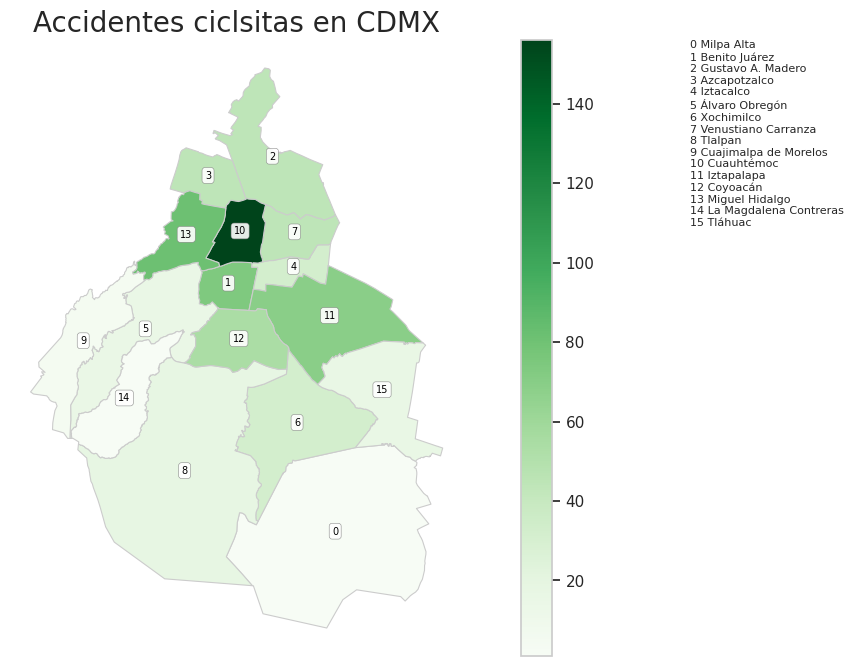

In [ ]:
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(15, 8))
df_merged.plot(column="count", cmap="Greens", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
ax.axis("off")

titulo = str("Accidentes ciclsitas en CDMX")
ax.set_title(titulo, fontdict={"fontsize": "20", "fontweight": "3"})

legend = ''

# Add annotation for every waterschap with a deelstroomgebied
bbox_props = dict(boxstyle="round", fc="w", ec="gray", alpha=0.9,lw=0.4)
for idx, row in df_merged.iterrows():    
    string = str(idx)
    x, y = row.geometry.centroid.coords[0]
    ax.annotate(string, xy=(x, y), color='black',
                    horizontalalignment='center', bbox=bbox_props, fontsize=7)
    legend = legend + f"{idx} {row['nomgeo']}\n"

ax.text(1.5, 1, legend,
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax.transAxes,
    fontsize=8)

fig.savefig(titulo + ".png", dpi=300)

plt.show()

In [ ]:
df_merged2 =df_merged.copy()
df_merged2['count'] = np.round((df_merged2['count']/df_merged2['count'].sum()) * 100, 2)
df_merged2

,nomgeo,geometry,count
0,Milpa Alta,"POLYGON ((-98.99723 19.22731, -98.99745 19.227...",0.15
1,Benito Juárez,"POLYGON ((-99.13679 19.40156, -99.13682 19.401...",10.79
2,Gustavo A. Madero,"POLYGON ((-99.11860 19.58446, -99.11691 19.581...",6.41
3,Azcapotzalco,"POLYGON ((-99.18231 19.50748, -99.18229 19.507...",6.41
4,Iztacalco,"POLYGON ((-99.05584 19.42196, -99.05589 19.421...",4.66
5,Álvaro Obregón,"POLYGON ((-99.18871 19.39475, -99.18868 19.394...",2.19
6,Xochimilco,"POLYGON ((-99.09870 19.31964, -99.09849 19.319...",4.66
7,Venustiano Carranza,"POLYGON ((-99.10895 19.45273, -99.10889 19.452...",6.41
8,Tlalpan,"POLYGON ((-99.19629 19.30228, -99.19595 19.302...",2.62
9,Cuajimalpa de Morelos,"POLYGON ((-99.25698 19.40043, -99.25694 19.400...",0.73


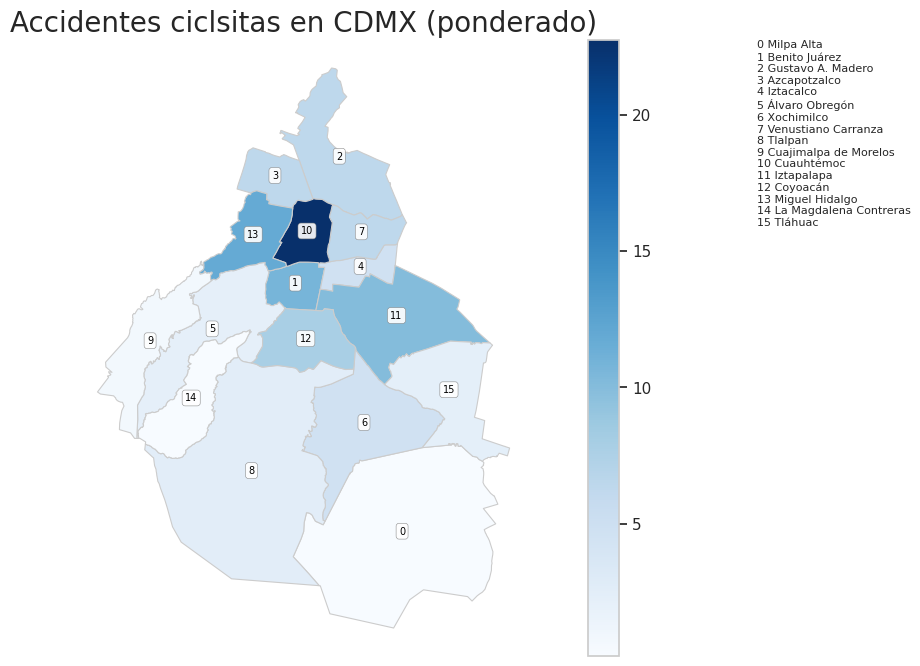

In [ ]:
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(15, 8))
df_merged2.plot(column="count", cmap="Blues", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
ax.axis("off")

titulo = str("Accidentes ciclsitas en CDMX (ponderado)")
ax.set_title(titulo, fontdict={"fontsize": "20", "fontweight": "3"})

legend = ''

# Add annotation for every waterschap with a deelstroomgebied
bbox_props = dict(boxstyle="round", fc="w", ec="gray", alpha=0.9,lw=0.4)
for idx, row in df_merged2.iterrows():    
    string = str(idx)
    x, y = row.geometry.centroid.coords[0]
    ax.annotate(string, xy=(x, y), color='black',
                    horizontalalignment='center', bbox=bbox_props, fontsize=7)
    legend = legend + f"{idx} {row['nomgeo']}\n"

ax.text(1.5, 1, legend,
    horizontalalignment='left',
    verticalalignment='top',
    transform=ax.transAxes,
    fontsize=8)

fig.savefig(titulo + ".png", dpi=300)

plt.show()

## Tipo de accidentes

In [ ]:
states

,no_folio,fecha_even,ano_evento,mes,hora,condicion,tipo_de_ev,coordenada,coordena_1,punto_1,...,unidad_med,lugar_del_,trasladado,hospital,dia,hora2,prioridad,observacio,ID,geometry
0,908158,2019-01-02,2019,Enero,13:51,LESIONADO,CAIDA DE CICLISTA,-99.133040,19.425890,JOSE MA IZAZAGA,...,ERUM,None,1.0,RUBEN LEÃ‘ERO,miÃ©rcoles,13.0,MEDIA,None,1.0,POINT (-11035439.534 2205142.302)
1,913421,2019-01-05,2019,Enero,11:43,LESIONADO,CHOQUE,-99.159938,19.307784,SAN ALEJANDRO,...,ERUM,None,0.0,None,sÃ¡bado,11.0,BAJA,None,2.0,POINT (-11038433.805 2191206.223)
2,917736,2019-01-07,2019,Enero,21:39,LESIONADO,CAIDA DE CICLISTA,-99.140726,19.359761,EJE 8 SUR,...,ERUM,None,0.0,None,lunes,21.0,BAJA,None,3.0,POINT (-11036295.135 2197338.076)
3,918818,2019-01-08,2019,Enero,14:20,LESIONADO,CHOQUE,-99.129643,19.452971,EJE 2 OTE,...,CRUZ ROJA,None,0.0,None,martes,14.0,BAJA,None,4.0,POINT (-11035061.381 2208339.187)
4,921067,2019-01-09,2019,Enero,11:16,LESIONADO,CHOQUE,-99.123565,19.396535,CALZ GRAL IGNACIO ZARAGOZA,...,ERUM,None,0.0,None,miÃ©rcoles,11.0,BAJA,None,5.0,POINT (-11034384.781 2201677.575)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,2332323,2019-12-28,2019,Diciembre,1:31,LESIONADO,CAIDA DE CICLISTA,-99.297696,19.347056,PROL 16 DE SEPTIEMBRE,...,PC,None,0.0,None,sÃ¡bado,1.0,BAJA,None,682.0,POINT (-11053768.956 2195839.056)
682,2334516,2019-12-28,2019,Diciembre,19:51,LESIONADO,CHOQUE,-99.099310,19.474964,EJE 3 OTE,...,SAMU,None,0.0,None,sÃ¡bado,19.0,BAJA,None,683.0,POINT (-11031684.727 2210935.832)
683,2337044,2019-12-29,2019,Diciembre,13:55,LESIONADO,CHOQUE,-99.137348,19.426271,JOSE MA IZAZAGA,...,ERUM,None,0.0,None,domingo,13.0,BAJA,None,684.0,POINT (-11035919.098 2205187.275)
684,2339464,2019-12-30,2019,Diciembre,11:14,LESIONADO,CHOQUE,-99.139106,19.293363,AV DE LAS TORRES,...,ERUM,None,0.0,None,lunes,11.0,BAJA,None,685.0,POINT (-11036114.798 2189505.288)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=25df4652-e935-424f-95eb-02091fa21a09' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>